<a href="https://colab.research.google.com/github/nguyenvudev20/mse22.imageprocessing/blob/main/Quiz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Digital Image and Video Processing - Quiz 02 
#### Nguyễn Văn Vũ

1. Convert the objects’ color as follows: the square to red, the rectangle to
green, the pentagon to blue, the circle to magenta and the star to cyan.
2. 
- (a) Convert the original image to binary and display the result.
- (b) Use erosion and/or dilation to draw the edge of the objects. You can
choose any structuring element to apply.
- (c) Generate a structuring element as below. Could we count the number
of coins using this structuring element?



In [1]:
!apt-get install -y git

Reading package lists... Done
Building dependency tree       
Reading state information... Done
git is already the newest version (1:2.25.1-1ubuntu3.10).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


In [2]:
!git clone https://github.com/nguyenvudev20/mse22.imageprocessing.git nguyenvu

Cloning into 'nguyenvu'...
remote: Enumerating objects: 211, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (163/163), done.
remote: Total 211 (delta 69), reused 50 (delta 2), pack-reused 46
Receiving objects: 100% (211/211), 15.36 MiB | 15.05 MiB/s, done.
Resolving deltas: 100% (74/74), done.


In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import urllib.request
from skimage.util import random_noise
from skimage import io, color
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops
from skimage import io, color, morphology
fz=10
path_folder="nguyenvu/image/"

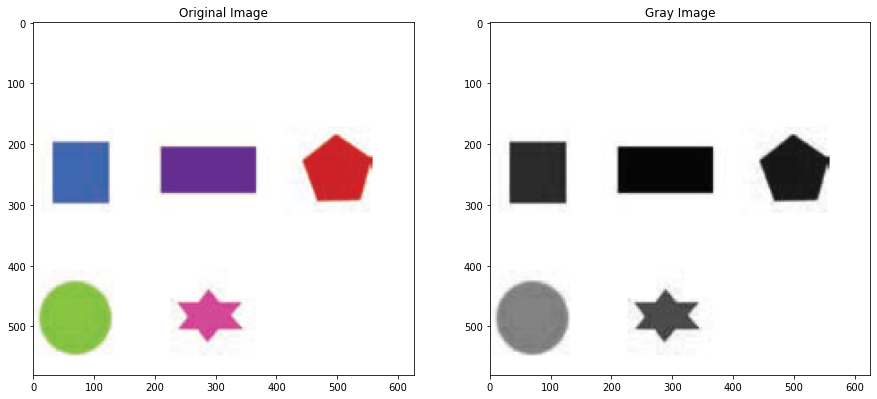

In [4]:
#@title Load Image
# Load image
img = cv2.imread(path_folder+'shapes.png')
img[:10]=255
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(gray, cmap='gray'), plt.title('Gray Image')
plt.show()

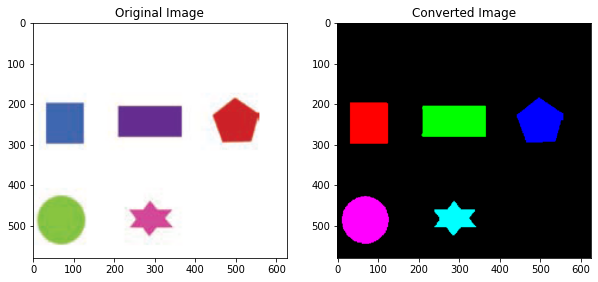

In [5]:
#@title  1. Convert the objects’ color as follows: the square to red, the rectangle to green, the pentagon to blue, the circle to magenta and the star to cyan.

# binarize image
level = threshold_otsu(gray)
bwImg = 1 - (gray > level)

# convert colors
L = label(bwImg, connectivity=1)
cmap = np.array([                               
                 [0, 0, 255], #blue
                 [255, 0, 0], #red 
                 [0, 255, 0], #green
                 [255, 0, 255], #pink                  
                 [0, 255, 255] #cyan
                 ]) / 255
# [magenta red green cyan blue]
rgblabel = color.label2rgb(L, colors=cmap, bg_label=0)

# plot results
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(rgblabel), plt.title('Converted Image')
plt.show()
plt.show()



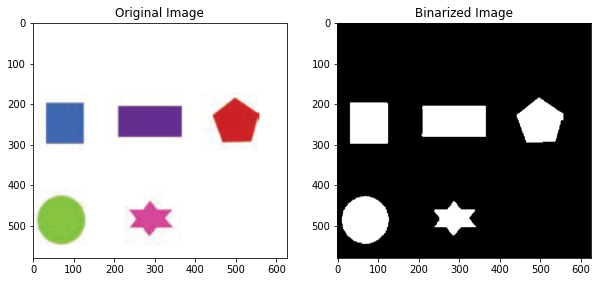

In [6]:
#@title  2.(a) Convert the original image to binary and display the result.
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(bwImg, cmap='gray'), plt.title('Binarized Image')
plt.show()


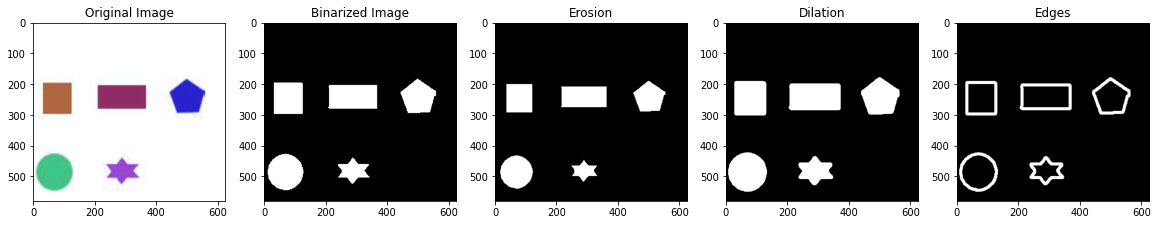

In [12]:
#@title  2.(b) Use erosion and/or dilation to draw the edge of the objects. You can choose any structuring element to apply.

# erode and dilate image to get the edges
selem = morphology.disk(5)
eroded = morphology.erosion(bwImg, selem)
dilated = morphology.dilation(bwImg, selem)
edges = dilated - eroded


# plot results
fig, ax = plt.subplots(1, 5, figsize=(20, 10))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(bwImg, cmap='gray')
ax[1].set_title('Binarized Image')
ax[2].imshow(eroded, cmap='gray')
ax[2].set_title('Erosion')
ax[3].imshow(dilated, cmap='gray')
ax[3].set_title('Dilation')
ax[4].imshow(edges, cmap='gray')
ax[4].set_title('Edges')
plt.show()


In [14]:
#@title  2.(c) Generate a structuring element as below. Could we count the number of coins using this structuring element?

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, morphology
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops_table


# generate structuring element
selem = morphology.disk(radius=10, dtype=bool)

# apply morphological opening to smooth the boundaries of the coins
opened = morphology.opening(bwImg, selem)

# label connected regions and filter small objects
L = label(opened, connectivity=2)
min_coin_size = 3000
coin_props = regionprops_table(L, properties=('label', 'area'))
coins = [coin_props[i]['label'] for i in range(len(coin_props)) if coin_props[i]['area'] > min_coin_size]

# count number of coins
num_coins = len(coins)
print(f'Number of coins: {num_coins}')

# plot results
fig, ax = plt.subplots(1, 3, figsize=(9, 3))
ax[0].imshow(Img)
ax[0].set_title('Original Image')
ax[1].imshow(bwImg, cmap='gray')
ax[1].set_title('Binarized Image')
ax[2].imshow(opened, cmap='gray')
ax[2].set_title('Opened Image')
for a in ax:
    a.axis('off')
plt.show()


KeyError: ignored